In [1]:
%matplotlib inline

In [2]:
import os
import time
import sys

# libs
import sklearn.cluster as skcluster
import numpy

# project files
import utils.filehandler as filehandler
import view.plot as viewer
import utils.learning as lrn

In [3]:
# defining hyperparameters
Kcluster = 7 # there is 7 emotions

# import data
dataset = filehandler.import_csv('../fer2018/fer2018.csv')
#(x_train, y_train, x_validation, y_validation) = filehandler.classic_split(dataset, 0.75)
(x_train, y_train, x_validation, y_validation) = filehandler.balance_dataset(dataset, 0.75)

# dictionary to save and compare accuracy for different amounts of attributes
acc_dct = {}

importing ../fer2018/fer2018.csv


F:\Code_ecole\datamining\datamining_coursework2\src\utils\filehandler.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = data_frame.as_matrix()



importation done in: 18.114455461502075
happy:..... 8989
sad:....... 6077
angry:..... 4953
disgust:... 547
fear:...... 5121
neutral:... 6198
surprise:.. 4002
train balanced: 2870
validation set: 34058


In [4]:
# Classifier initialization
classifier_full = skcluster.AgglomerativeClustering(linkage='ward', n_clusters=7)

classifier70= skcluster.AgglomerativeClustering(linkage='ward', n_clusters=7)
classifier35= skcluster.AgglomerativeClustering(linkage='ward', n_clusters=7)
classifier14= skcluster.AgglomerativeClustering(linkage='ward', n_clusters=7)
classifier10= skcluster.AgglomerativeClustering(linkage='ward', n_clusters=7)
classifier5= skcluster.AgglomerativeClustering(linkage='ward', n_clusters=7)
classifier2= skcluster.AgglomerativeClustering(linkage='ward', n_clusters=7)

In [5]:
predsms = lrn.get_preds_fitpred(classifier_full, x_train, x_validation)
labels = classifier_full.labels_
labels_unique = numpy.unique(labels)
print("number of estimated clusters", len(labels_unique))
# classification accuracy calculation
viewer.overall_accuracy(acc_dct, '2304', predsms, y_train)
#viewer.accuracy_plots('2304', predsms, y_validation)

Fitting data...
18.096640586853027 seconds to fit data
Making predictions...
16.752551317214966 seconds to predict the classes
number of estimated clusters 7
418 out of 2870
14.564% correctly predicted


0.1456445993031359

In [6]:
# Importing data from each individual emotion file
angryset = filehandler.import_csv('../fer2018/fer2018angry.csv')
(x_angry, y_angry, _, _) = filehandler.classic_split(angryset, 100)

disgustset = filehandler.import_csv('../fer2018/fer2018disgust.csv')
(x_disgust, y_disgust, _, _) = filehandler.classic_split(disgustset, 100)

fearset = filehandler.import_csv('../fer2018/fer2018fear.csv')
(x_fear, y_fear, _, _) = filehandler.classic_split(fearset, 100)

happyset = filehandler.import_csv('../fer2018/fer2018happy.csv')
(x_happy, y_happy, _, _) = filehandler.classic_split(happyset, 100)

sadset = filehandler.import_csv('../fer2018/fer2018sad.csv')
(x_sad, y_sad, _, _) = filehandler.classic_split(sadset, 100)

surpriseset = filehandler.import_csv('../fer2018/fer2018surprise.csv')
(x_surprise, y_surprise, _, _) = filehandler.classic_split(surpriseset, 100)

neutralset = filehandler.import_csv('../fer2018/fer2018neutral.csv')
(x_neutral, y_neutral, _, _) = filehandler.classic_split(neutralset, 100)

"""
BEST FEATURE COLLECTION
"""

# Search for top TEN attributes for each emotion
print("Searching for top 10 attributes...")
x_angry_10 = lrn.get_k_best(x_angry, y_angry, 10)
x_disgust_10 = lrn.get_k_best(x_disgust, y_disgust, 10)
x_fear_10 = lrn.get_k_best(x_fear, y_fear, 10)
x_happy_10 = lrn.get_k_best(x_happy, y_happy, 10)
x_sad_10 = lrn.get_k_best(x_sad, y_sad, 10)
x_surprise_10 = lrn.get_k_best(x_surprise, y_surprise, 10)
x_neutral_10 = lrn.get_k_best(x_neutral, y_neutral, 10)

# Search for top FIVE attributes for each emotion
print("Searching for top 5 attributes...")
x_angry_5 = lrn.get_k_best(x_angry, y_angry, 5)
x_disgust_5 = lrn.get_k_best(x_disgust, y_disgust, 5)
x_fear_5 = lrn.get_k_best(x_fear, y_fear, 5)
x_happy_5 = lrn.get_k_best(x_happy, y_happy, 5)
x_sad_5 = lrn.get_k_best(x_sad, y_sad, 5)
x_surprise_5 = lrn.get_k_best(x_surprise, y_surprise, 5)
x_neutral_5 = lrn.get_k_best(x_neutral, y_neutral, 5)

# Search for top TWO attributes for each emotion
print("Searching for top 2 attributes...")
x_angry_2 = lrn.get_k_best(x_angry, y_angry, 2)
x_disgust_2 = lrn.get_k_best(x_disgust, y_disgust, 2)
x_fear_2 = lrn.get_k_best(x_fear, y_fear, 2)
x_happy_2 = lrn.get_k_best(x_happy, y_happy, 2)
x_sad_2 = lrn.get_k_best(x_sad, y_sad, 2)
x_surprise_2 = lrn.get_k_best(x_surprise, y_surprise, 2)
x_neutral_2 = lrn.get_k_best(x_neutral, y_neutral, 2)

"""
DATASET REDUCTION
"""
# 14, 35, and 70 non-class attribute reduction:
top_attrs = {2 : numpy.array([x_angry_2, x_disgust_2, x_fear_2, x_happy_2, x_sad_2, x_surprise_2, x_neutral_2]).flatten(),
        5 : numpy.array([x_angry_5, x_disgust_5, x_fear_5, x_happy_5, x_sad_5, x_surprise_5, x_neutral_5]).flatten(),
        10 : numpy.array([x_angry_10, x_disgust_10, x_fear_10, x_happy_10, x_sad_10, x_surprise_10, x_neutral_10]).flatten()}

print("\nReducing datasets...")
x_train_70 = lrn.reduce_attr(x_train, top_attrs[10])
x_train_35 = lrn.reduce_attr(x_train, top_attrs[5])
x_train_14 = lrn.reduce_attr(x_train, top_attrs[2])
x_validation_70 = lrn.reduce_attr(x_validation, top_attrs[10])
x_validation_35 = lrn.reduce_attr(x_validation, top_attrs[5])
x_validation_14 = lrn.reduce_attr(x_validation, top_attrs[2])

"""
ATTEMPT TO IMPROVE CLASSIFICATION WITH NEW DATASETS
"""
print("\n70 attribute classification")
preds = lrn.get_preds_fitpred(classifier70, x_train_70, x_validation_70)
labels = classifier70.labels_
labels_unique = numpy.unique(labels)
print("number of estimated clusters", len(labels_unique))
viewer.overall_accuracy(acc_dct, '70', preds, y_train)
#viewer.accuracy_plots('70', preds, y_validation)

print("\n35 attribute classification")
preds = lrn.get_preds_fitpred(classifier35, x_train_35, x_validation_35)
labels = classifier35.labels_
labels_unique = numpy.unique(labels)
print("number of estimated clusters", len(labels_unique))
viewer.overall_accuracy(acc_dct, '35', preds, y_train)
#viewer.accuracy_plots('35', preds, y_validation)

print("\n14 attribute classification")
preds = lrn.get_preds_fitpred(classifier14, x_train_14, x_validation_14)
labels = classifier14.labels_
labels_unique = numpy.unique(labels)
print("number of estimated clusters", len(labels_unique))
viewer.overall_accuracy(acc_dct, '14', preds, y_train)
#viewer.accuracy_plots('14', preds, y_validation)

importing ../fer2018/fer2018angry.csv


F:\Code_ecole\datamining\datamining_coursework2\src\utils\filehandler.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = data_frame.as_matrix()



importation done in: 15.248278617858887
importing ../fer2018/fer2018disgust.csv

importation done in: 17.06340003013611
importing ../fer2018/fer2018fear.csv

importation done in: 16.135477542877197
importing ../fer2018/fer2018happy.csv

importation done in: 15.933184385299683
importing ../fer2018/fer2018sad.csv

importation done in: 16.22946810722351
importing ../fer2018/fer2018surprise.csv

importation done in: 16.738813877105713
importing ../fer2018/fer2018neutral.csv

importation done in: 17.008824586868286
Searching for top 10 attributes...
Searching for top 5 attributes...
Searching for top 2 attributes...

Reducing datasets...

70 attribute classification
Fitting data...
0.5196425914764404 seconds to fit data
Making predictions...
0.5445728302001953 seconds to predict the classes
number of estimated clusters 7
385 out of 2870
13.415% correctly predicted

35 attribute classification
Fitting data...
0.44763827323913574 seconds to fit data
Making predictions...
0.5190825462341309 s

0.16829268292682928

In [7]:
"""
DATASET REDUCTION BASED ON CLASS
"""
# 2, 5, and 10 non-class attribute reduction:
# the top attributes of each specific emotion
top_attrs_emo = {2 : [x_angry_2, x_disgust_2, x_fear_2, x_happy_2, x_sad_2, x_surprise_2, x_neutral_2],
                5 : [x_angry_5, x_disgust_5, x_fear_5, x_happy_5, x_sad_5, x_surprise_5, x_neutral_5],
                10 : [x_angry_10, x_disgust_10, x_fear_10, x_happy_10, x_sad_10, x_surprise_10, x_neutral_10]}

# transforming the overall emotion dataset
x_train_10 = lrn.reduce_data_emo(top_attrs_emo, x_train, y_train, 10)
x_train_5 = lrn.reduce_data_emo(top_attrs_emo, x_train, y_train, 5)
x_train_2 = lrn.reduce_data_emo(top_attrs_emo, x_train, y_train, 2)
x_validation_10 = lrn.reduce_data_emo(top_attrs_emo, x_validation, y_validation, 10)
x_validation_5 = lrn.reduce_data_emo(top_attrs_emo, x_validation, y_validation, 5)
x_validation_2 = lrn.reduce_data_emo(top_attrs_emo, x_validation, y_validation, 2)

"""
2nd ATTEMPT TO IMPROVE CLASSIFICATION WITH NEW DATASETS
"""
print("\n10 attribute classification")
preds = lrn.get_preds_fitpred(classifier10, x_train_10, x_validation_10)
labels = classifier10.labels_
labels_unique = numpy.unique(labels)
print("number of estimated clusters", len(labels_unique))
viewer.overall_accuracy(acc_dct, '10', preds, y_train)
#viewer.accuracy_plots('10', preds, y_validation)

print("\n5 attribute classification")
preds = lrn.get_preds_fitpred(classifier5, x_train_5, x_validation_5)
labels = classifier5.labels_
labels_unique = numpy.unique(labels)
print("number of estimated clusters", len(labels_unique))
viewer.overall_accuracy(acc_dct, '5', preds, y_train)
#viewer.accuracy_plots('5', preds, y_validation)

print("\n2 attribute classification")
preds = lrn.get_preds_fitpred(classifier2, x_train_2, x_validation_2)
labels = classifier2.labels_
labels_unique = numpy.unique(labels)
print("number of estimated clusters", len(labels_unique))
viewer.overall_accuracy(acc_dct, '2', preds, y_train)
#viewer.accuracy_plots('2', preds, y_validation)


10 attribute classification
Fitting data...
0.558521032333374 seconds to fit data
Making predictions...
0.43483591079711914 seconds to predict the classes
number of estimated clusters 7
366 out of 2870
12.753% correctly predicted

5 attribute classification
Fitting data...
0.49681520462036133 seconds to fit data
Making predictions...
0.34607386589050293 seconds to predict the classes
number of estimated clusters 7
525 out of 2870
18.293% correctly predicted

2 attribute classification
Fitting data...
0.27132177352905273 seconds to fit data
Making predictions...
0.217726469039917 seconds to predict the classes
number of estimated clusters 7
258 out of 2870
8.990% correctly predicted


0.08989547038327526

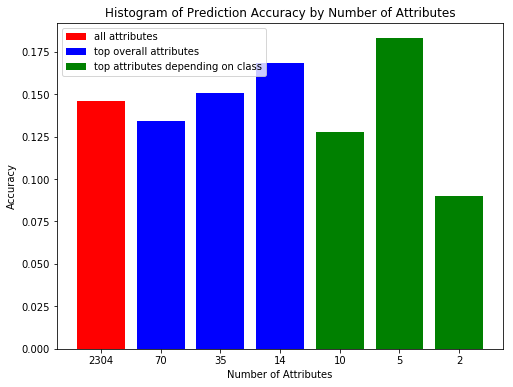

<Figure size 432x288 with 0 Axes>

In [8]:
"""
ACCURACY SUMMARY
"""
viewer.disp_acc_summary(acc_dct)